# Predicción de partidos de fútbol

In [2]:
import pandas as pd

import os

os.chdir("C:/Users/Sandra/Downloads")
# Cargar el archivo Excel en un DataFrame de pandas

# Cargar el archivo Excel en un DataFrame de pandas
data = pd.read_excel('datos_definitivos.xlsx')

print(data.head())

    Season       Date    HomeTeam     AwayTeam  PartidoSeason  ELOHomeT  \
0  2019-20 2019-08-16  Ath Bilbao    Barcelona              1         0   
1  2019-20 2019-08-17       Celta  Real Madrid              1         0   
2  2019-20 2019-08-17    Valencia     Sociedad              1         0   
3  2019-20 2019-08-17    Mallorca        Eibar              1         0   
4  2019-20 2019-08-17     Leganes      Osasuna              1         0   

   ELOHomeM  ELOAwayT  ELOAwayM  AtaqueMedioH  AtaqueMedioA  TarjetasRMedioH  \
0         0         0         0           0.0           0.0              0.0   
1         0         0         0           0.0           0.0              0.0   
2         0         0         0           0.0           0.0              0.0   
3         0         0         0           0.0           0.0              0.0   
4         0         0         0           0.0           0.0              0.0   

   TarjetasRMedioA Resultado  
0              0.0         H  
1     

## 1. EDA

In [96]:
print(f'Cantidad de filas y columnas: {data.shape}')
print('Nombre columnas:',data.columns)

print('tipos de dato:',data.dtypes)
print(data.describe())

Cantidad de filas y columnas: (1599, 14)
Nombre columnas: Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'PartidoSeason', 'ELOHomeT',
       'ELOHomeM', 'ELOAwayT', 'ELOAwayM', 'AtaqueMedioH', 'AtaqueMedioA',
       'TarjetasRMedioH', 'TarjetasRMedioA', 'Resultado'],
      dtype='object')
tipos de dato: Season                     object
Date               datetime64[ns]
HomeTeam                   object
AwayTeam                   object
PartidoSeason               int64
ELOHomeT                    int64
ELOHomeM                    int64
ELOAwayT                    int64
ELOAwayM                    int64
AtaqueMedioH              float64
AtaqueMedioA              float64
TarjetasRMedioH           float64
TarjetasRMedioA           float64
Resultado                  object
dtype: object
                                Date  PartidoSeason     ELOHomeT     ELOHomeM  \
count                           1599    1599.000000  1599.000000  1599.000000   
mean   2021-08-27 12:29:16.097560832     

In [4]:
valores_faltantes = data.isnull().sum()
valores_faltantes_porcentaje = 100*valores_faltantes/len(data)

valores_faltantes_df = pd.DataFrame({'count': valores_faltantes, 'percent': valores_faltantes_porcentaje})
valores_faltantes_df.sort_values('percent', ascending=False)

,count,percent
Season,0,0.0
Date,0,0.0
HomeTeam,0,0.0
AwayTeam,0,0.0
PartidoSeason,0,0.0
ELOHomeT,0,0.0
ELOHomeM,0,0.0
ELOAwayT,0,0.0
ELOAwayM,0,0.0
AtaqueMedioH,0,0.0


In [5]:
# Codificar la variable respuesta
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Resultado'] = label_encoder.fit_transform(data['Resultado'])

In [6]:
X = data.drop(['PartidoSeason','Resultado', 'Date', 'Season', 'HomeTeam', 'AwayTeam'], axis=1)
y = data['Resultado']

In [7]:
!pip install timeseries-cv
from sklearn.model_selection import TimeSeriesSplit

Defaulting to user installation because normal site-packages is not writeable


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False) #importa no hacerlo de manera aleatoria

## 2. Árboles de decisión

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [103]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 10],
}

In [104]:
dt_clf = DecisionTreeClassifier(random_state=3)

In [105]:
# GridSearchCV
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10),
                           scoring='accuracy', n_jobs=-1)

In [106]:
import time
# Guardar el tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [107]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [108]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [109]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar el tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 9.53 segundos


In [110]:
best_dt = grid_search.best_estimator_

In [111]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")


Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 15}
Precisión del modelo en el conjunto de entrenamiento: 0.4929


In [112]:
y_pred = best_dt.predict(X_test)
y_pred_prob = best_dt.predict_proba(X_test)  # Probabilidades para AUC

In [113]:
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

Precisión del modelo en el conjunto de prueba: 46.75%
Precisión (Precision) en el conjunto de prueba: 33.52%
Recuperación (Recall) en el conjunto de prueba: 46.75%
F1-score en el conjunto de prueba: 38.36%
AUC en el conjunto de prueba: 57.58%


In [114]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[ 32   0  78]
 [ 27   0  73]
 [ 34   1 155]]


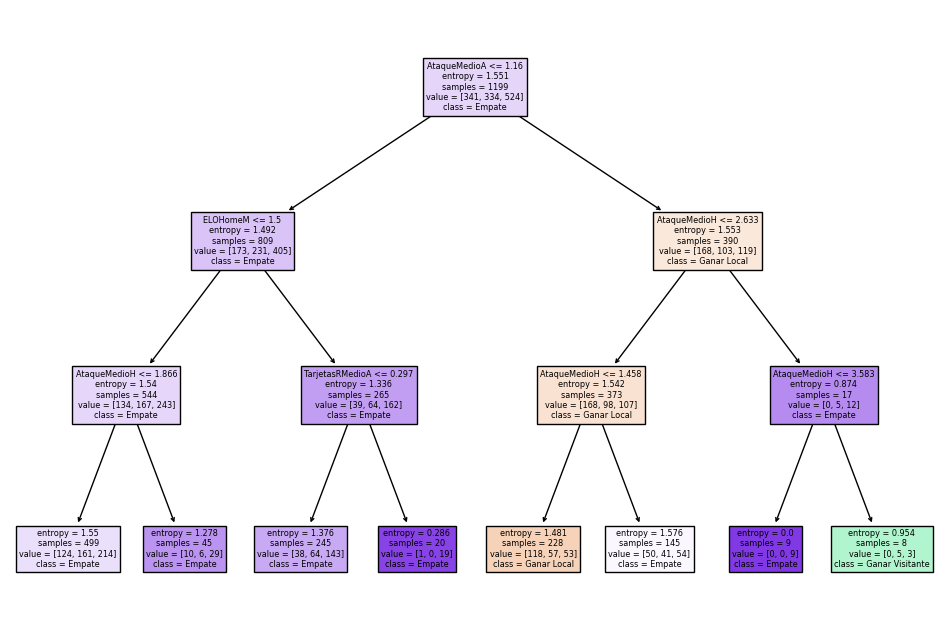

In [115]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

best_dt.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=X_train.columns, class_names=['Ganar Local', 'Ganar Visitante', 'Empate'], filled=True)
plt.show()


## Random Forest

In [116]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 10],
}

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=3)

In [118]:
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10),
                           scoring='accuracy', n_jobs=-1)

In [119]:
import time
# Guardar el tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [120]:
# GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [121]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [122]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 455.04 segundos


In [123]:
# mejor modelo
best_rf = grid_search.best_estimator_

In [124]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
accuracy_train = best_rf.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Precisión del modelo en el conjunto de entrenamiento: 0.5254


In [125]:
# Realiza predicciones
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)  # Probabilidades para AUC

In [126]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

Precisión del modelo en el conjunto de prueba: 49.00%
Precisión (Precision) en el conjunto de prueba: 39.35%
Recuperación (Recall) en el conjunto de prueba: 49.00%
F1-score en el conjunto de prueba: 42.03%
AUC en el conjunto de prueba: 60.92%


In [127]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[ 46   3  61]
 [ 25   1  74]
 [ 35   6 149]]


## Regresion logistica

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
param_grid = {'penalty': [None],
              'C': [1]}

In [11]:
lr_clf = LogisticRegression(max_iter=1000, random_state=3)
grid_search = GridSearchCV(estimator=lr_clf, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10),
                           scoring='accuracy', n_jobs=-1)

In [12]:
import time
# Guardar e l tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=LogisticRegression(max_iter=1000, random_state=3),
             n_jobs=-1, param_grid={'C': [1], 'penalty': [None]},
             scoring='accuracy')

In [14]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [15]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 5.17 segundos


In [16]:
best_lr = grid_search.best_estimator_
print("Mejor parámetro C encontrado:", grid_search.best_params_)
accuracy_train = best_lr.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejor parámetro C encontrado: {'C': 1, 'penalty': None}
Precisión del modelo en el conjunto de entrenamiento: 0.4846


In [19]:
y_pred = best_lr.predict(X_test)
y_pred_prob = best_lr.predict_proba(X_test)  # Probabilidades para AUC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Precisión del modelo en el conjunto de prueba: 49.75%
Precisión (Precision) en el conjunto de prueba: 45.07%
Recuperación (Recall) en el conjunto de prueba: 49.75%
F1-score en el conjunto de prueba: 42.14%
AUC en el conjunto de prueba: 60.73%
Matriz de confusión:
[[ 45   1  64]
 [ 22   1  77]
 [ 36   1 153]]


## 5. SVM
1º kernel lineal

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

In [139]:
param_grid = {
    'C': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'kernel': ['linear']
}

In [140]:
svm_model = SVC(random_state=3, probability=True)

In [141]:
grid_search_accur = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=4), scoring='accuracy')
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=4), scoring='accuracy')

In [142]:
import time
# Guardar e l tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [143]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=SVC(probability=True, random_state=3),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32],
                         'kernel': ['linear']},
             scoring='accuracy')

In [73]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [74]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 261.21 segundos


In [79]:
print("Mejores parámetros encontrados:")
best_svm_model_lineal = grid_search.best_estimator_
print(grid_search.best_params_)
accuracy_train = best_svm_model_lineal.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejores parámetros encontrados:
{'C': 2, 'gamma': 0.03125, 'kernel': 'rbf'}
Precisión del modelo en el conjunto de entrenamiento: 0.5163


In [80]:
best_svm_model_lineal = grid_search.best_estimator_
y_pred = best_svm_model_lineal.predict(X_test)
y_pred_prob = best_svm_model_lineal.predict_proba(X_test)  # Probabilidades para AUC

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))


Accuracy: 50.75%
Precisión del modelo en el conjunto de prueba: 50.75%
Precisión (Precision) en el conjunto de prueba: 46.64%
Recuperación (Recall) en el conjunto de prueba: 50.75%
F1-score en el conjunto de prueba: 45.12%
AUC en el conjunto de prueba: 58.60%


In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 45   0  65]
 [ 18   0  82]
 [ 36   0 154]]


2º kernel rbf: Gausiano

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

Solo con accuracy

In [48]:
param_grid = {
    'C': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'gamma': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'kernel': ['rbf']
}

In [57]:
svm_model = SVC(probability=True)

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=4), scoring='accuracy')

In [58]:
import time
# Guardar e l tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [59]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,
                               16, 32],
                         'gamma': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4,
                                   8, 16, 32],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [60]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [61]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

El tiempo de CPU total es 225.63 segundos


In [62]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

Mejores parámetros encontrados:
{'C': 2, 'gamma': 0.03125, 'kernel': 'rbf'}
Precisión del modelo en el conjunto de entrenamiento: 0.4929


In [63]:
best_svm_model_gau = grid_search.best_estimator_
y_pred = best_svm_model_gau.predict(X_test)
y_pred_prob = best_svm_model_gau.predict_proba(X_test)  # Probabilidades para AUC

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo en el conjunto de prueba: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision) en el conjunto de prueba: {:.2f}%".format(precision * 100))
print("Recuperación (Recall) en el conjunto de prueba: {:.2f}%".format(recall * 100))
print("F1-score en el conjunto de prueba: {:.2f}%".format(f1*100))
print("AUC en el conjunto de prueba: {:.2f}%".format(auc*100))

Accuracy: 50.75%
Precisión del modelo en el conjunto de prueba: 50.75%
Precisión (Precision) en el conjunto de prueba: 46.64%
Recuperación (Recall) en el conjunto de prueba: 50.75%
F1-score en el conjunto de prueba: 45.12%
AUC en el conjunto de prueba: 57.94%


In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 40   7  63]
 [ 18   8  74]
 [ 26   9 155]]


3º kernel polinómico

In [279]:
param_grid = {
    'C': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'gamma': [2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4, 2**5],
    'degree': [2, 3, 4, 5],
    'kernel': ['poly']
}

In [280]:
svm_model = SVC()

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=TimeSeriesSplit(n_splits=10), scoring='accuracy')

In [281]:
import time
# Guardar el tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [ ]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

In [ ]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
accuracy_train = best_dt.score(X_train, y_train)
print(f"Precisión del modelo en el conjunto de entrenamiento: {accuracy_train:.4f}")

In [ ]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

## 6. Redes Neuronales

In [283]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [284]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50,)],
    'activation': ['logistic'],
    'solver': ['adam'],
    'max_iter': [200, 500, 1000],
}

In [285]:
# clasificador MLP
mlp_classifier = MLPClassifier()

In [286]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
# búsqueda de hiperparámetros
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=TimeSeriesSplit(n_splits=10), scoring='accuracy')

import time
# Guardar el tiempo antes de ejecutar la funcion de entrenamiento
start_time = time.time()

grid_search.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_mult

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [(100,), (100, 50), (50,)],
                         'max_iter': [200, 500, 1000], 'solver': ['adam']},
             scoring='accuracy')

In [ ]:
# Guardar el tiempo despues de ejecutar la funcion de entrenamiento
end_time = time.time ()

In [ ]:
# Calcular el tiempo de CPU total
cpu_time = end_time - start_time
# Mostrar e l tiempo de CPU total
print(f"El tiempo de CPU total es {cpu_time:.2f} segundos")

In [288]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'max_iter': 1000, 'solver': 'adam'}


In [289]:
# Entrena el modelo con los mejores parámetros encontrados
best_mlp_classifier = grid_search.best_estimator_
best_mlp_classifier.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              max_iter=1000)

In [290]:
# Realiza predicciones
y_pred = best_mlp_classifier.predict(X_test_scaled)
y_pred_prob = best_mlp_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para AUC

In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Realiza predicciones
y_pred = best_mlp_classifier.predict(X_test_scaled)
y_pred_prob = best_mlp_classifier.predict_proba(X_test_scaled)  # Probabilidades para AUC

# Calcula varias métricas para problemas multiclase
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# AUC para cada clase y promedio ponderado
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

print("Precisión del modelo: {:.2f}%".format(accuracy * 100))
print("Precisión (Precision): {:.2f}%".format(precision * 100))
print("Recuperación (Recall): {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("AUC: {:.2f}%".format(auc * 100))

Precisión del modelo: 49.00%
Precisión (Precision): 36.22%
Recuperación (Recall): 49.00%
F1-score: 40.88%
AUC: 61.48%


## TSVM


In [292]:
import pandas as pd

# Cargar el archivo Excel en un DataFrame de pandas
datos = pd.read_excel('datos_tsvm.xlsx')

print(datos.head())

    Season       Date    HomeTeam     AwayTeam  PartidoSeason  ELOHomeT  \
0  2019-20 2019-08-16  Ath Bilbao    Barcelona              1         0   
1  2019-20 2019-08-17       Celta  Real Madrid              1         0   
2  2019-20 2019-08-17    Valencia     Sociedad              1         0   
3  2019-20 2019-08-17    Mallorca        Eibar              1         0   
4  2019-20 2019-08-17     Leganes      Osasuna              1         0   

   ELOHomeM  ELOAwayT  ELOAwayM  AtaqueMedioH  AtaqueMedioA  TarjetasRMedioH  \
0         0         0         0           0.0           0.0              0.0   
1         0         0         0           0.0           0.0              0.0   
2         0         0         0           0.0           0.0              0.0   
3         0         0         0           0.0           0.0              0.0   
4         0         0         0           0.0           0.0              0.0   

   TarjetasRMedioA Resultado  
0              0.0         H  
1     

In [293]:
valores_faltantes = data.isnull().sum()
valores_faltantes_porcentaje = 100*valores_faltantes/len(data)

valores_faltantes_df = pd.DataFrame({'count': valores_faltantes, 'percent': valores_faltantes_porcentaje})
valores_faltantes_df.sort_values('percent', ascending=False)

,count,percent
Season,0,0.0
Date,0,0.0
HomeTeam,0,0.0
AwayTeam,0,0.0
PartidoSeason,0,0.0
ELOHomeT,0,0.0
ELOHomeM,0,0.0
ELOAwayT,0,0.0
ELOAwayM,0,0.0
AtaqueMedioH,0,0.0


In [294]:
# Codificar la variable respuesta
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Resultado'] = label_encoder.fit_transform(datos['Resultado'])

In [295]:
X = datos.drop(['PartidoSeason','Resultado', 'Date', 'Season', 'HomeTeam', 'AwayTeam'], axis=1)
y = datos['Resultado']

In [296]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, shuffle=False) #importa no hacerlo de manera aleatoria

In [297]:
# Modelo
model_tsvm = TwinSVMClassifier()

param_grid_tsvm_radial = {
    'Epsilon1': [0.1],
    'Epsilon2': [0.1],
    'C1':[2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
    'C2':[2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
    'kernel_type': [3], # 1 lineal, 2 polinomial, 3 radial
    'kernel_param': [2**(-5),2**(-3),2**(-1),2**(1),2**(3),2**(5)],
}

In [298]:
keys, values = zip(*param_grid_tsvm_radial.items())

In [299]:
# Generar todas las combinaciones de valores de parámetros
combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]

In [300]:
# Búsqueda de hiperparámetros con validación cruzada estratificada
stratified_cv = TimeSeriesSplit(n_splits=5)
best_auc = 0

In [301]:
for params_sel in combinations:
    print(params_sel)
    auc_folds = []
    for train_index, test_index in stratified_cv.split(X_train_1, y_train_1):
        X_train_inner = X_train_1.iloc[train_index]
        X_test_inner = X_train_1.iloc[test_index]
        y_train_inner = y_train_1.iloc[train_index]
        y_test_inner = y_train_1.iloc[test_index]

        # Asegúrate de que los datos están en el formato correcto
        X_train_inner = X_train_inner.to_numpy()
        X_test_inner = X_test_inner.to_numpy()
        y_train_inner = y_train_inner.to_numpy()
        y_test_inner = y_test_inner.to_numpy()

        # Inicializar el modelo con los parámetros seleccionados
        twin_svm = TwinSVMClassifier(**params_sel)

        # Entrenar el modelo
        twin_svm.fit(X_train_inner, y_train_inner)

        # Hacer predicciones
        y_pred_prob = twin_svm.decision_function(X_test_inner)

        # Calcular métricas de evaluación
        auc = roc_auc_score(y_test_inner, y_pred_prob)
        auc_folds.append(auc)

    mean_auc = sum(auc_folds) / len(auc_folds)
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_params = params_sel

{'Epsilon1': 0.1, 'Epsilon2': 0.1, 'C1': 0.03125, 'C2': 0.03125, 'kernel_type': 3, 'kernel_param': 0.03125}
Y
['H' 'A' 'A' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'A' 'H' 'A' 'A' 'H' 'A' 'A' 'A'
 'A' 'H' 'A' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'A'
 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'A' 'H' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'H' 'A'
 'A' 'A' 'H' 'H' 'A' 'H' 'H' 'A' 'A' 'H' 'A' 'A' 'H' 'H' 'A' 'H' 'A' 'A'
 'H' 'H' 'H' 'H' 'H' 'A' 'A' 'H' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'A' 'A' 'H'
 'H' 'H' 'H' 'H' 'A' 'H' 'A' 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'H' 'H' 'H' 'A'
 'H' 'A' 'H' 'A' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'H' 'H' 'A' 'H' 'H' 'H'
 'H' 'A' 'A' 'H' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'H'
 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'H' 'A' 'H' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A'
 'A' 'H' 'H' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'A' 'H' 'A' 'A' 'H' 'A'
 'A' 'A' 'H' 'A' 'H' 'A' 'H' 'A' 'A' 'A' 'A' 'A' 'H' 'A' 'H' 'H' 'H' 'A'
 'A' 'H' 'H' 'A' 'H' 'A']
X
[[ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  

C:\Users\vigar\TFG\TVSVM.py:235: RuntimeWarning: invalid value encountered in divide
  distFromPlane1 = y1/w1mod
C:\Users\vigar\TFG\TVSVM.py:236: RuntimeWarning: invalid value encountered in divide
  distFromPlane2 = y2/w2mod


ValueError: Input contains NaN.

# Estrategia de apuestas

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import os

os.chdir("C:/Users/Sandra/Downloads")
# Cargar el archivo Excel en un DataFrame de pandas

nuevos_datos = pd.read_excel('datos_parte2.xlsx')
cuotas = pd.read_excel('cuotas.xlsx')

valores_faltantes = nuevos_datos.isnull().sum()
valores_faltantes_porcentaje = 100*valores_faltantes/len(nuevos_datos)


label_encoder = LabelEncoder()
nuevos_datos['Resultado'] = label_encoder.fit_transform(nuevos_datos['Resultado'])

train_df_nuevo = nuevos_datos[(nuevos_datos['Season'] >= '2019-20') & (nuevos_datos['Season'] <= '2022-23')]
test_df_nuevo = nuevos_datos[nuevos_datos['Season'] == '2023-24']

X_train_2 = train_df_nuevo.drop(columns=['Semana', 'Resultado', 'Date', 'Season', 'HomeTeam', 'AwayTeam'])
y_train_2 = train_df_nuevo['Resultado']
X_test_2 = test_df_nuevo.drop(columns=['Semana', 'Resultado', 'Date', 'Season', 'HomeTeam', 'AwayTeam'])
y_test_2 = test_df_nuevo['Resultado']

valores_faltantes_df = pd.DataFrame({'count': valores_faltantes, 'percent': valores_faltantes_porcentaje})
valores_faltantes_df.sort_values('percent', ascending=False)


,count,percent
Season,0,0.0
Date,0,0.0
HomeTeam,0,0.0
AwayTeam,0,0.0
Semana,0,0.0
ELOHomeT,0,0.0
ELOHomeM,0,0.0
ELOAwayT,0,0.0
ELOAwayM,0,0.0
AtaqueMedioH,0,0.0


In [170]:
cuotas

,Date,HomeTeam,AwayTeam,cuota local,cuota empate,cuota visitante
0,2023-08-11,Almeria,Vallecano,2.63,3.19,2.88
1,2023-08-11,Sevilla,Valencia,1.94,3.38,4.42
2,2023-08-12,Sociedad,Girona,1.79,3.64,4.87
3,2023-08-12,Las Palmas,Mallorca,2.60,2.89,3.24
4,2023-08-12,Ath Bilbao,Real Madrid,3.34,3.45,2.23
...,...,...,...,...,...,...
373,2024-05-25,Real Madrid,Betis,1.23,7.25,11.33
374,2024-05-26,Getafe,Mallorca,2.34,3.22,3.35
375,2024-05-26,Las Palmas,Alaves,2.36,3.46,3.08
376,2024-05-26,Celta,Valencia,1.93,3.70,3.96


In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

params = {'penalty': None, 'C': 1}
lr_clf = LogisticRegression(penalty=None,C=1,max_iter=1000, random_state=123)

lr_clf.fit(X_train_2, y_train_2)

y_pred_prob_2 = lr_clf.predict_proba(X_test_2)
y_pred_class_2 = lr_clf.predict(X_test_2)

In [212]:
equipo = "Celta"

cuotas_df_equipo = cuotas[(cuotas['HomeTeam'] == equipo)]

#test_df_equipo = test_df_nuevo[(test_df_nuevo['HomeTeam'] == equipo) | (test_df_nuevo['AwayTeam'] == equipo)]
test_df_equipo = test_df_nuevo[(test_df_nuevo['HomeTeam'] == equipo)]

X_test_equipo = test_df_equipo.drop(columns=['Semana', 'Resultado', 'Date', 'Season', 'HomeTeam', 'AwayTeam'])
y_test_equipo = test_df_equipo['Resultado']

cuotas_df_equipo

,Date,HomeTeam,AwayTeam,cuota local,cuota empate,cuota visitante
5,2023-08-13,Celta,Osasuna,2.11,3.18,3.93
21,2023-08-25,Celta,Real Madrid,4.64,3.85,1.78
42,2023-09-16,Celta,Mallorca,2.06,3.10,4.31
66,2023-09-28,Celta,Alaves,1.60,3.85,6.59
86,2023-10-08,Celta,Getafe,2.04,3.27,4.21
93,2023-10-21,Celta,Ath Madrid,3.46,3.51,2.17
112,2023-11-04,Celta,Sevilla,2.42,3.42,4.71
148,2023-12-04,Celta,Cadiz,1.55,4.18,6.59
160,2023-12-16,Celta,Granada,1.69,3.93,5.26
185,2024-01-03,Celta,Betis,2.23,3.28,3.48


In [213]:
test_df_equipo

,Season,Date,HomeTeam,AwayTeam,Semana,ELOHomeT,ELOHomeM,ELOAwayT,ELOAwayM,AtaqueMedioH,AtaqueMedioA,TarjetasRMedioH,TarjetasRMedioA,Resultado
1525,2023-24,2023-08-13,Celta,Osasuna,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0
1541,2023-24,2023-08-25,Celta,Real Madrid,2,-1,-1,2,1,0.000000,2.500000,0.000000,0.000000,0
1562,2023-24,2023-09-16,Celta,Mallorca,3,-2,-1,-1,-1,0.000000,1.500000,0.000000,0.000000,0
1586,2023-24,2023-09-28,Celta,Alaves,4,-3,-1,-3,-2,0.000000,0.000000,0.000000,0.000000,1
1606,2023-24,2023-10-08,Celta,Getafe,5,-3,0,-3,0,0.250000,1.500000,0.250000,0.000000,1
1613,2023-24,2023-10-21,Celta,Ath Madrid,6,-3,0,1,1,0.600000,2.250000,0.400000,0.000000,0
1632,2023-24,2023-11-04,Celta,Sevilla,7,-4,-1,-2,-1,0.500000,1.250000,0.333333,0.000000,1
1668,2023-24,2023-12-04,Celta,Cadiz,8,-4,0,-5,1,0.571429,0.571429,0.285714,0.142857,1
1680,2023-24,2023-12-16,Celta,Granada,9,-4,-1,-7,-7,0.625000,1.000000,0.375000,0.000000,2
1705,2023-24,2024-01-03,Celta,Betis,10,-3,0,-1,0,0.666667,0.888889,0.333333,0.111111,2


In [214]:
# Predecir probabilidades y clases para el equipo
y_pred_prob_equipo = lr_clf.predict_proba(X_test_equipo)
y_pred_class_equipo = lr_clf.predict(X_test_equipo)

resultados_equipo = test_df_equipo[['Date', 'HomeTeam', 'AwayTeam', 'Resultado']].copy()
resultados_equipo['Probabilidades'] = y_pred_prob_equipo.tolist()
resultados_equipo['Prediccion'] = y_pred_class_equipo

print(y_pred_class_equipo.tolist())

[2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2]


In [215]:
print(y_pred_prob_equipo)

[[0.27484377 0.35018156 0.37497467]
 [0.66301337 0.1727957  0.16419093]
 [0.4629324  0.26147188 0.27559572]
 [0.23284723 0.3670641  0.40008867]
 [0.43833513 0.24842699 0.31323789]
 [0.56270584 0.20931191 0.22798225]
 [0.37259718 0.29294805 0.33445478]
 [0.28603857 0.29677435 0.41718708]
 [0.22440154 0.3065981  0.46900036]
 [0.33242913 0.30591722 0.36165365]
 [0.3890287  0.27876905 0.33220224]
 [0.57680981 0.24318075 0.18000944]
 [0.54976186 0.26215171 0.18808644]
 [0.22429231 0.28311878 0.4925889 ]
 [0.32443321 0.31370874 0.36185805]
 [0.29966165 0.31746061 0.38287774]
 [0.41408685 0.29044593 0.29546722]
 [0.33921594 0.29374522 0.36703884]
 [0.25420552 0.28955902 0.45623546]]


In [216]:
b= cuotas_df_equipo['cuota local']
b =b.tolist()
b

[2.11,
 4.64,
 2.06,
 1.6,
 2.04,
 3.46,
 2.42,
 1.55,
 1.69,
 2.23,
 2.64,
 2.77,
 3.84,
 1.82,
 1.93,
 1.68,
 2.71,
 2.32,
 1.93]

In [217]:
probs_Sociedad_visitante = []
Kelly_f = []
pred_list = y_pred_class_equipo.tolist()
len(pred_list)

for i in range(len(pred_list)):
    probs_Sociedad_visitante.append(y_pred_prob_equipo[i][2])
    Kelly_f_aux = 1/2*(max(0, y_pred_prob_equipo[i][2] - (1- y_pred_prob_equipo[i][2])/b[i]))
    Kelly_f.append(Kelly_f_aux)

print(probs_Sociedad_visitante)
print(Kelly_f)



[0.37497467099686776, 0.1641909292680428, 0.2755957233872312, 0.40008867229098755, 0.3132378858536555, 0.22798225184801338, 0.3344547787247989, 0.4171870817827699, 0.46900035772606224, 0.3616536529004371, 0.33220224389237163, 0.18000944270288477, 0.1880864366998777, 0.49258890311644665, 0.36185804703486046, 0.38287773837359035, 0.2954672170686477, 0.3670388412536716, 0.4562354571748786]
[0.03937706796214663, 0.0, 0.0, 0.012572046236427381, 0.0, 0.0024278675205404027, 0.02971804612372153, 0.020589373724536536, 0.07739969298316787, 0.037699842795608035, 0.03962427419852893, 0.0, 0.0, 0.10689579856823614, 0.015607274044596137, 0.0077715294170304094, 0.017746010207506074, 0.04710537779357535, 0.08724608536849593]


In [218]:


print(y_test_equipo.tolist())# Resultado Real
#y_pred_prob_equipo # Rsultado prob
print(y_pred_class_equipo.tolist()) # Pronóstico clase
print(probs_Sociedad_visitante) # Probs gane Sociedad



[0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1]
[2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2]
[0.37497467099686776, 0.1641909292680428, 0.2755957233872312, 0.40008867229098755, 0.3132378858536555, 0.22798225184801338, 0.3344547787247989, 0.4171870817827699, 0.46900035772606224, 0.3616536529004371, 0.33220224389237163, 0.18000944270288477, 0.1880864366998777, 0.49258890311644665, 0.36185804703486046, 0.38287773837359035, 0.2954672170686477, 0.3670388412536716, 0.4562354571748786]


In [219]:
bankroll = [1000]

for i in range(len(probs_Sociedad_visitante)):
    if (y_test_equipo.tolist())[i] == (y_pred_class_equipo.tolist())[i]:
        bankroll_aux = bankroll[i]*(Kelly_f[i] + 1)
    else: 
        bankroll_aux = bankroll[i]*(-Kelly_f[i] + 1)
    bankroll.append(bankroll_aux)

del bankroll[-1]
bankroll



[1000,
 960.6229320378534,
 960.6229320378534,
 960.6229320378534,
 948.5459361205011,
 948.5459361205011,
 950.8488799905488,
 922.5915091183007,
 903.5959277419798,
 973.5339751300498,
 1010.2360529486361,
 1050.2659233159125,
 1050.2659233159125,
 1050.2659233159125,
 1162.5349378977728,
 1144.3909365355846,
 1153.2846043634538,
 1132.8184040022604,
 1186.180242894302]

In [220]:
resultados_equipo['BR_Sandra'] = bankroll
resultados_equipo

,Date,HomeTeam,AwayTeam,Resultado,Probabilidades,Prediccion,BR_Sandra
1525,2023-08-13,Celta,Osasuna,0,"[0.27484377330771304, 0.35018155569541914, 0.3...",2,1000.000000
1541,2023-08-25,Celta,Real Madrid,0,"[0.663013369137138, 0.1727957015948193, 0.1641...",0,960.622932
1562,2023-09-16,Celta,Mallorca,0,"[0.46293239555838306, 0.26147188105438574, 0.2...",0,960.622932
1586,2023-09-28,Celta,Alaves,1,"[0.2328472255696765, 0.3670641021393358, 0.400...",2,960.622932
1606,2023-10-08,Celta,Getafe,1,"[0.4383351267057689, 0.2484269874405757, 0.313...",0,948.545936
1613,2023-10-21,Celta,Ath Madrid,0,"[0.5627058374069034, 0.20931191074508318, 0.22...",0,948.545936
1632,2023-11-04,Celta,Sevilla,1,"[0.37259717616589566, 0.2929480451093055, 0.33...",0,950.848880
1668,2023-12-04,Celta,Cadiz,1,"[0.2860385683582214, 0.29677434985900863, 0.41...",2,922.591509
1680,2023-12-16,Celta,Granada,2,"[0.224401542857631, 0.3065980994163068, 0.4690...",2,903.595928
1705,2024-01-03,Celta,Betis,2,"[0.3324291300764463, 0.3059172170231165, 0.361...",2,973.533975


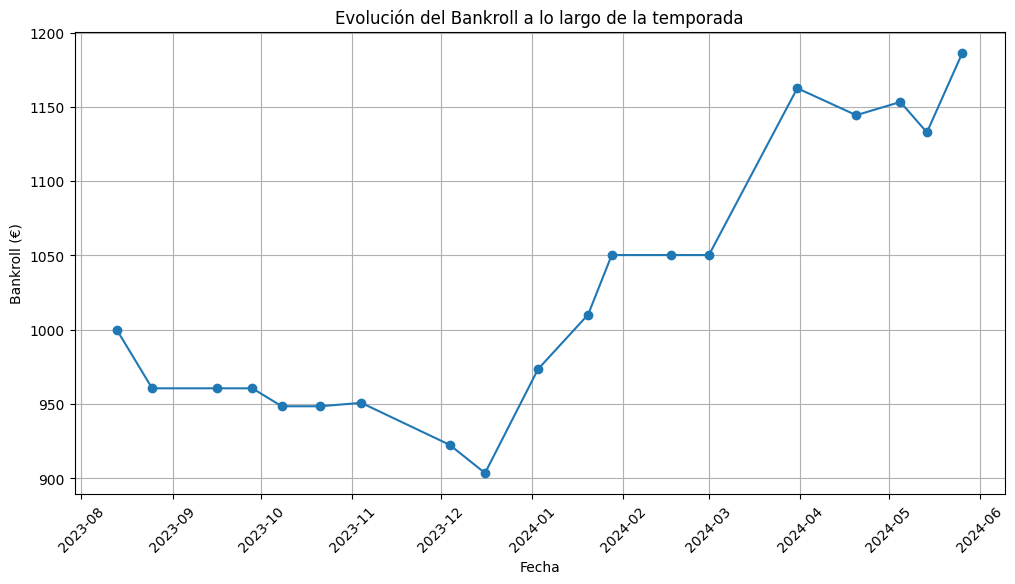

In [221]:
plt.figure(figsize=(12, 6))
plt.plot(resultados_equipo['Date'], resultados_equipo['BR_Sandra'], marker='o')
plt.title('Evolución del Bankroll a lo largo de la temporada')
plt.xlabel('Fecha')
plt.ylabel('Bankroll (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:

ROI = [bankroll]

for index, row in resultados_equipo.iterrows():
    fraccion_local = row['Fraccion_Kelly_Local']
    fraccion_visitante = row['Fraccion_Kelly_Visitante']
    fraccion_empate = row['Fraccion_Kelly_Empate']

    if row['Resultado'] == 0:  # Gana equipo local
        if row['Prediccion'] == 0:
            bankroll += fraccion_local * (row['cuota local'] - 1) * bankroll
        else:
            bankroll -= fraccion_local * bankroll
    elif row['Resultado'] == 2:  # Gana equipo visitante
        if row['Prediccion'] == 2:
            bankroll += fraccion_visitante * (row['cuota visitante'] - 1) * bankroll
        else:
            bankroll -= fraccion_visitante * bankroll
    elif row['Resultado'] == 1:  # Empate
        if row['Prediccion'] == 1:
            bankroll += fraccion_empate * (row['cuota empate'] - 1) * bankroll
        else:
            bankroll -= fraccion_empate * bankroll
    
    ROI.append(bankroll)
    resultados_equipo.at[index, 'Bankroll'] = bankroll

In [43]:
print(y_test_equipo.tolist())

[1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0]


In [45]:
resultados_equipo = resultados_equipo.merge(cuotas, on=['Date', 'HomeTeam', 'AwayTeam'], how='left')

In [46]:
# Fracción de Kelly 
def calcular_fraccion_kelly(probabilidades, cuota):
    p = probabilidades
    b = cuota - 1
    return max(0, (p - (1 - p)) / b)

resultados_equipo['Fraccion_Kelly_Local'] = resultados_equipo.apply(
    lambda row: calcular_fraccion_kelly(row['Probabilidades'][0], row['cuota local']), axis=1)
resultados_equipo['Fraccion_Kelly_Visitante'] = resultados_equipo.apply(
    lambda row: calcular_fraccion_kelly(row['Probabilidades'][2], row['cuota visitante']), axis=1)
resultados_equipo['Fraccion_Kelly_Empate'] = resultados_equipo.apply(
    lambda row: calcular_fraccion_kelly(row['Probabilidades'][1], row['cuota empate']), axis=1)

In [47]:
# fracción de Kelly mitad del valor original
resultados_equipo['Fraccion_Kelly_Local'] /= 2
resultados_equipo['Fraccion_Kelly_Visitante'] /= 2
resultados_equipo['Fraccion_Kelly_Empate'] /= 2

resultados_equipo = resultados_equipo.sort_values(by='Date')
print(resultados_equipo)

         Date     HomeTeam     AwayTeam  Resultado  \
0  2023-08-12     Sociedad       Girona          1   
1  2023-08-19     Sociedad        Celta          1   
2  2023-08-25   Las Palmas     Sociedad          1   
3  2023-09-02     Sociedad      Granada          2   
4  2023-09-17  Real Madrid     Sociedad          2   
5  2023-09-24     Sociedad       Getafe          2   
6  2023-09-27     Valencia     Sociedad          0   
7  2023-09-30     Sociedad   Ath Bilbao          2   
8  2023-10-08   Ath Madrid     Sociedad          2   
9  2023-10-21     Sociedad     Mallorca          2   
10 2023-10-29    Vallecano     Sociedad          1   
11 2023-11-04     Sociedad    Barcelona          0   
12 2023-11-11      Almeria     Sociedad          0   
13 2023-11-26     Sociedad      Sevilla          2   
14 2023-12-02      Osasuna     Sociedad          1   
15 2023-12-09   Villarreal     Sociedad          0   
16 2023-12-17     Sociedad        Betis          1   
17 2023-12-21        Cadiz  

In [29]:
bankroll = 1000
resultados_equipo['Bankroll'] = bankroll

resultados_equipo['Bankroll'] = resultados_equipo['Bankroll'].astype(float)

ROI = [bankroll]

for index, row in resultados_equipo.iterrows():
    fraccion_local = row['Fraccion_Kelly_Local']
    fraccion_visitante = row['Fraccion_Kelly_Visitante']
    fraccion_empate = row['Fraccion_Kelly_Empate']

    if row['Resultado'] == 0:  # Gana equipo local
        if row['Prediccion'] == 0:
            bankroll += fraccion_local * (row['cuota local'] - 1) * bankroll
        else:
            bankroll -= fraccion_local * bankroll
    elif row['Resultado'] == 2:  # Gana equipo visitante
        if row['Prediccion'] == 2:
            bankroll += fraccion_visitante * (row['cuota visitante'] - 1) * bankroll
        else:
            bankroll -= fraccion_visitante * bankroll
    elif row['Resultado'] == 1:  # Empate
        if row['Prediccion'] == 1:
            bankroll += fraccion_empate * (row['cuota empate'] - 1) * bankroll
        else:
            bankroll -= fraccion_empate * bankroll
    
    ROI.append(bankroll)
    resultados_equipo.at[index, 'Bankroll'] = bankroll

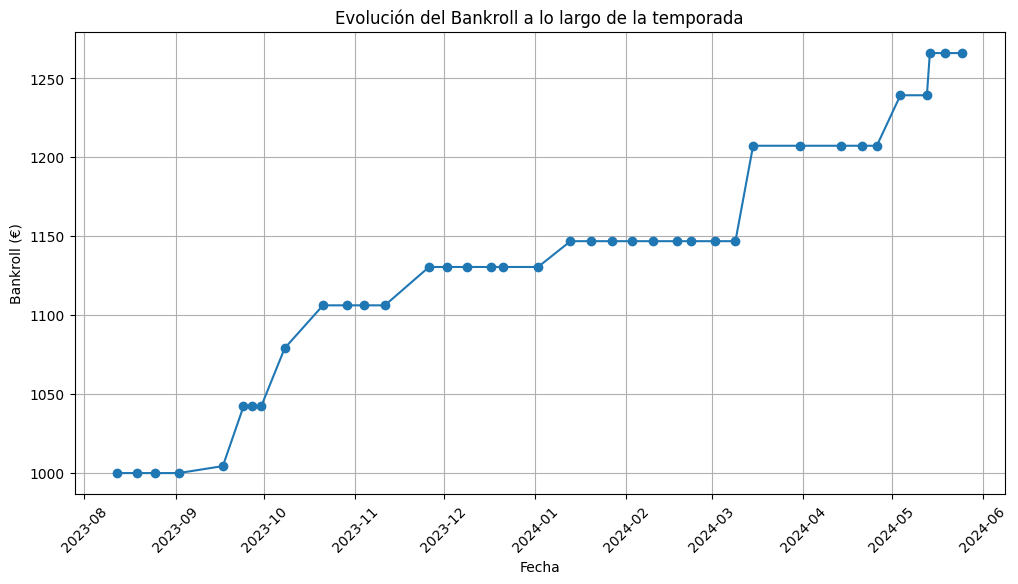

         Date     HomeTeam     AwayTeam  Fraccion_Kelly_Local  \
0  2023-08-12     Sociedad       Girona                   0.0   
1  2023-08-19     Sociedad        Celta                   0.0   
2  2023-08-25   Las Palmas     Sociedad                   0.0   
3  2023-09-02     Sociedad      Granada                   0.0   
4  2023-09-17  Real Madrid     Sociedad                   0.0   
5  2023-09-24     Sociedad       Getafe                   0.0   
6  2023-09-27     Valencia     Sociedad                   0.0   
7  2023-09-30     Sociedad   Ath Bilbao                   0.0   
8  2023-10-08   Ath Madrid     Sociedad                   0.0   
9  2023-10-21     Sociedad     Mallorca                   0.0   
10 2023-10-29    Vallecano     Sociedad                   0.0   
11 2023-11-04     Sociedad    Barcelona                   0.0   
12 2023-11-11      Almeria     Sociedad                   0.0   
13 2023-11-26     Sociedad      Sevilla                   0.0   
14 2023-12-02      Osasun

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(resultados_equipo['Date'], resultados_equipo['Bankroll'], marker='o')
plt.title('Evolución del Bankroll a lo largo de la temporada')
plt.xlabel('Fecha')
plt.ylabel('Bankroll (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


tabla_resumida = resultados_equipo[['Date', 'HomeTeam', 'AwayTeam', 'Fraccion_Kelly_Local', 'Fraccion_Kelly_Visitante', 'Fraccion_Kelly_Empate', 'Bankroll']]
print(tabla_resumida)
